Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.preprocessing import image_dataset_from_directory

In [2]:
Image_Width=200
Image_Height=200
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

Creating Training data arrays

In [3]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

<function __main__.<lambda>(category)>

Reshaping the array size to fit into inputs

In [4]:
main_dir = "./Images/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [5]:
X = X/255.0

Building the Model. Used BatchNormalization, Dropout and Flatten here. L2 and L1 regularisation gives poorer results.

In [6]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout
l2 = 0.001
model = Sequential()
model.add(Conv2D(128,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="SGD",
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 128)       1280      
                                                                 
 batch_normalization (Batch  (None, 78, 78, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 39, 39, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        73792     
                                                                 
 batch_normalization_1 (Bat  (None, 37, 37, 64)      

Fitting the Training data to the model

In [17]:
history = model.fit(X, y, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
625/625 [==============================] - 134s 215ms/step - loss: 0.1320 - accuracy: 0.9510 - val_loss: 0.7904 - val_accuracy: 0.7140
Epoch 2/3
625/625 [==============================] - 138s 222ms/step - loss: 0.1151 - accuracy: 0.9588 - val_loss: 0.7476 - val_accuracy: 0.7332
Epoch 3/3
625/625 [==============================] - 1253s 2s/step - loss: 0.1045 - accuracy: 0.9633 - val_loss: 0.5834 - val_accuracy: 0.8028


Saving the model:

In [20]:
model.save('./CatsVSDogs_12epochs.h5')

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading the test dataset into an array

In [21]:
train_dir = "test"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
# img_array = cv2.imread(os.path('./Images/test/1.jpg')),cv2.IMREAD_GRAYSCALE
# new_img_array = cv2.resize(img_array, dsize=(80, 80))
# X_test.append(new_img_array)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

Predicting the test data using the model and then storing the labels in a CSV file

In [22]:
predictions = model.predict(X_test)

391/391 [==============================] - 19s 49ms/step


In [23]:
predicted_val = [int(round(p[0])) for p in predictions]

In [24]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [25]:
submission_df.to_csv("submission.csv", index=False)

Plotting the graphs from the model

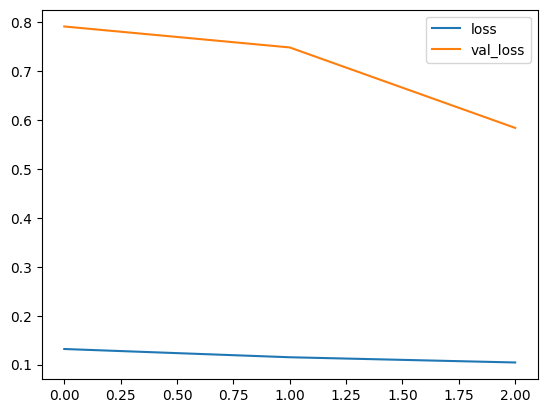

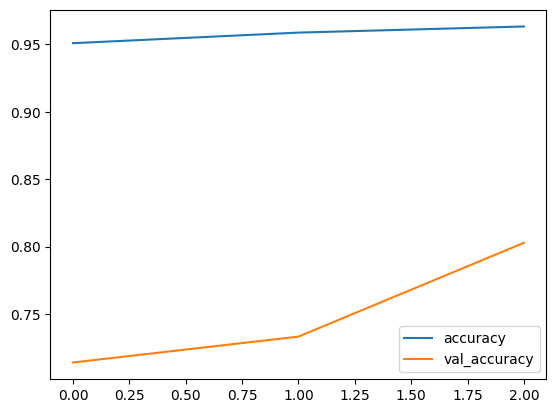

In [19]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show()

Random Individual Picture data tests

In [26]:
pic = cv2.imread(('./Images/test/1.jpg'),cv2.IMREAD_GRAYSCALE)
picNew = cv2.resize(pic, dsize=(80, 80))
picNew = np.array(picNew).reshape(-1,80,80,1)
picNew = picNew/255

prediction = model.predict(picNew)
predicted_val = [int(round(p[0])) for p in prediction]
for i in range(len(predicted_val)):
    if(predicted_val[i]==0):
        print("cat")
    else:
        print("dog")

1/1 [==============================] - 0s 28ms/step
dog
